In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

names = ["date", "city", "state", "country", "shape", "duration_seconds", "duration_reported", "description", "report_date", "latitude", "longitude"]

ufo = pd.read_csv("/srv/nbgrader/data/ufo-scrubbed-geocoded-time-standardized.csv", names = names, parse_dates = ["date", "report_date"])

In [2]:
total_time = ufo.groupby(["state"])["duration_seconds"].sum()

total_sightings = ufo.groupby(["state"])["report_date"].count()

In [3]:
df = pd.DataFrame([total_time, total_sightings])

In [4]:
df

state,ab,ak,al,ar,az,bc,ca,co,ct,dc,...,tx,ut,va,vt,wa,wi,wv,wy,yk,yt
duration_seconds,590526.0,1498068.0,962845.5,67177514.5,15990939.1,869341.82,37928460.47,4551714.1,12670360.05,114961.23,...,8719429.25,3521102.0,13738539.5,330819.5,57812602.14,2729937.3,3032327.0,377534.001,10218.0,15974.0
report_date,333.0,354.0,691.0,666.0,2689.0,788.00,9655.00,1505.0,968.00,99.00,...,3677.00,743.0,1393.0,307.0,4268.00,1333.0,486.0,205.000,7.0,13.0


In [5]:
df.rename({'report_date': 'total_sightings'}, inplace=True)

In [6]:
ufo_vals = df.transpose()

In [7]:
ufo_vals.describe()

,duration_seconds,total_sightings
count,6.700000e+01,67.000000
mean,7.361724e+06,1112.462687
std,1.631502e+07,1462.977146
min,1.021800e+04,7.000000
25%,4.041390e+05,200.500000
50%,1.781951e+06,691.000000
75%,5.676579e+06,1389.500000
max,8.465105e+07,9655.000000


In [8]:
ufo_vals.loc["mi"]

duration_seconds    8046018.6
total_sightings        2071.0
Name: mi, dtype: float64

In [9]:
import cartopy

In [10]:
states = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural',
                                    name='admin_1_states_provinces_lakes_shp')

In [11]:
reader =cartopy.io.shapereader.Reader(states)

In [12]:
all_states = list(reader.records())

In [13]:
all_states[0]

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x7fdfb2cdf1d0>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3514', 'diss_me': 3514, 'adm1_cod_1': 'USA-3514', 'iso_3166_2': 'US-MN', 'wikipedia': 'http://en.wikipedia.org/wiki/Minnesota', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 1, 'admin0_lab': 2, 'name': 'Minnesota', 'name_alt': 'MN|Minn.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US32', 'code_hasc': 'US.MN', 'note': '', 'hasc_maybe': '', 'region': 'Midwest', 'region_cod': '', 'region_big': 'West North Central', 'big_code': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 10, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Minn.', 'postal': 'MN', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 9, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>

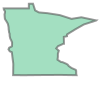

In [14]:
_.geometry

In [15]:
geometries = [state.geometry for state in all_states]

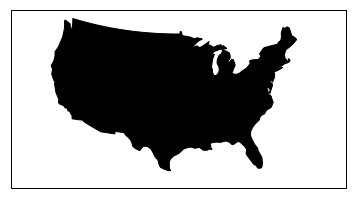

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], cartopy.crs.Geodetic())
ax.add_geometries(geometries, crs=cartopy.crs.PlateCarree(), edgecolors='k', facecolors = 'k')

In [17]:
import matplotlib.cm as cm

In [18]:
cm.viridis(0.4)

(0.16362499999999999, 0.47113300000000002, 0.55814799999999998, 1.0)

In [19]:
import ipywidgets

In [20]:
@ipywidgets.interact(field = ["total_sightings", "duration_seconds"] )
def make_plot(field):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection = cartopy.crs.LambertConformal())
    ax.set_extent([-125, -66.5, 20, 50], cartopy.crs.Geodetic())
    colors = {'IL': 'k', 'CA': 'r'}
    min_val = np.log10(ufo_vals[field].min())
    max_val = np.log10(ufo_vals[field].max())
    for state in all_states:
        postal_code = state.attributes['postal'].lower()
        n = np.log10(ufo_vals.loc[postal_code][field])
        norm = (n - min_val)/(max_val - min_val)
        color = cm.viridis(norm)
        ax.add_geometries( [state.geometry], crs = cartopy.crs.PlateCarree(),
                         facecolors = [color])

interactive(children=(Dropdown(description='field', options=('total_sightings', 'duration_seconds'), value='total_sightings'), Output()), _dom_classes=('widget-interact',))

In [21]:
mass = ufo[ ufo["state"] == "ma" ]

In [22]:
import numpy as np


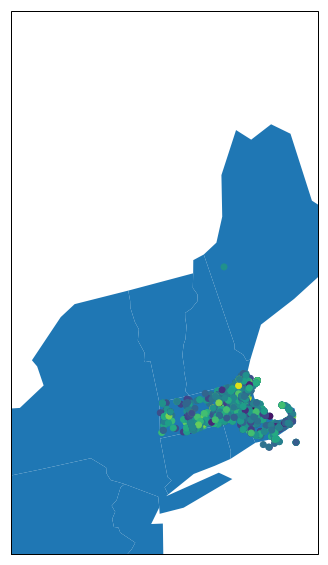

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = cartopy.crs.LambertConformal())
ax.set_extent([-75, -70, 40, 50], cartopy.crs.Geodetic())
ax.add_geometries(geometries, crs = cartopy.crs.PlateCarree(), zorder=0)
ax.scatter(mass["longitude"], mass["latitude"], transform = cartopy.crs.Geodetic(),
          c=np.log10(mass["duration_seconds"]))

In [24]:
import cartopy.io.img_tiles as cimgt

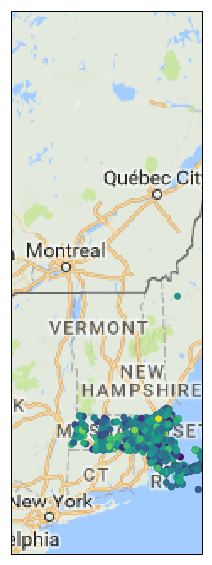

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = cartopy.crs.GOOGLE_MERCATOR)
ax.set_extent([-75, -70, 40, 50], cartopy.crs.Geodetic())
ax.add_image(cimgt.GoogleTiles(), 5)
ax.scatter(mass["longitude"], mass["latitude"], transform = cartopy.crs.Geodetic(),
          c=np.log10(mass["duration_seconds"]))

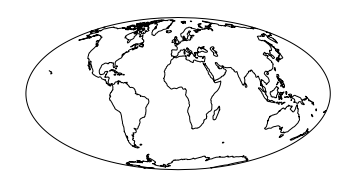

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
ax.coastlines()